# Модули

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import figure
%config InlineBackend.figure_format = 'svg'  # векторный формат

rc = {'font.family': 'serif',
      'font.serif': 'Times New Roman',
      'font.variant': 'normal',
      'font.weight':  'normal',
      'font.stretch': 'normal',
      'font.style': 'normal',
      'font.size':    14.0,
      'mathtext.default': 'regular',
      'mathtext.fontset': 'stix'}
plt.rcParams.update(rc)

# Определение диапазонов варьирования входных проектных параметров

## Исходные данные

In [3]:
p_min = 4 * 1e6

p_max = 20 * 1e6

p_h = 0.1 * 1e6

f_a_max = 0.9

D_n = 610 * 1e-3

F_m = np.pi * D_n ** 2 / 4
hi = 0.98
R_g = 550.84
n_kr = 1.1604
k = n = 1.1755
p_a = 0.1 * 1e6
z = 0.3239
T_r = 2999.5
I_P = 2250 * 1e3
t_nom = 20

P = I_P / t_nom

lambda_max = ((n + 1) / (n - 1)) ** 0.5

R_sm = R_g * (1 - z)

A_n = (n_kr * (2 / (n_kr + 1)) ** ((n_kr + 1) / (n_kr - 1))) ** 0.5

betta = (R_sm * hi * T_r) ** 0.5 / A_n

etta_f = P / (p_h * F_m)

## Функции

In [4]:
def lambda_a(p_a, p):
    global lambda_max, n
    return lambda_max * (1 - (p_a / p) ** ((n - 1) / n)) ** 0.5


def dzeta(lam):
    global z, k
    return (1 - z) + z * (2 * k) / (k + 1) * (lam) ** 2 / (lam ** 2 + 1)


def eps(lam):
    global k
    return (1 - (k - 1) / (k + 1) * lam ** 2) ** (1 / (k - 1))


def pi(lam):
    global k
    return (1 - (k - 1) / (k + 1) * lam ** 2) ** (k / (k - 1))


def q(lam):
    global k
    return lam * eps(lam) / ((2 / (k + 1)) ** (1 / (k - 1)))


def tau(lam):
    global k
    return 1 - ((k - 1) / (k + 1)) * lam ** 2


def I_ud(p, lam):
    global betta, p_h
    return betta * ((lam + lam ** -1) * eps(1) * dzeta(lam) - p_h / p * 1 / q(lam))


def f_a_bound1(p, lam):
    global etta_f, p_h
    return etta_f / (p / p_h * (lam ** 2 + 1) * eps(lam) * dzeta(lam) - 1)


def f_a_bound2(p, lam):
    global etta_f, p_h
    return etta_f / (p / p_h * (lam ** 2 + 1) / tau(lam) * dzeta(lam) - 1)


def f_a_bound3(I_ud3, lam):
    global etta_f, betta
    return etta_f * (betta / I_ud3 * (lam + lam ** -1) * eps(1) * dzeta(lam) - 1)


def v_a(lam):
    return 1 / q(lam)


def p_a3(p, lam):
    return p * pi(lam)

## Первая точка

In [5]:
lambda_a1 = lambda_a(p_a, p_min)
f_a1 = f_a_bound1(p_min, lambda_a1)
v_a1 = v_a(lambda_a1)
I_ud1 = I_ud(p_min, lambda_a1)
print('lambda_a1 =', lambda_a1)
print('v_a1 =', v_a1)
print('f_a1 =', f_a1)
print('p_nom1 =', p_min)
print('p_a1 / p_h1 =', p_a3(p_min, lambda_a1) / p_h)
print('I_ud1 =', I_ud1)

lambda_a1 = 2.291167065974499
v_a1 = 6.232691522319996
f_a1 = 0.4045269914602411
p_nom1 = 4000000.0
p_a1 / p_h1 = 1.0000000000000013
I_ud1 = 2421.329491432348


## Вторая точка

In [6]:
lambda_a2 = lambda_a(p_a, p_max)
f_a2 = round(f_a_bound1(p_max, lambda_a2), 2)
v_a2 = v_a(lambda_a2)
I_ud2 = I_ud(p_max, lambda_a2)
print('lambda_a2 =', lambda_a2)
print('v_a2 =', v_a2)
print('f_a2 =', f_a2)
print('p_nom2 =', p_max)
print('p_a2 / p_h2 =', p_a3(p_max, lambda_a2) / p_h)
print('I_ud2 =', I_ud2)

lambda_a2 = 2.603062177035649
v_a2 = 21.57063399633351
f_a2 = 0.24
p_nom2 = 20000000.0
p_a2 / p_h2 = 1.0000000000000002
I_ud2 = 2787.532112113906


## Третья точка

In [7]:
N = 1000
i = 1
while i <= lambda_a1 - 0.1:
    if I_ud(p_max, i) < I_ud1:
        I_ud3 = I_ud(p_max, i)
        lambda_a3 = i
    else:
        break
    i += 0.001
f_a3 = f_a_bound3(I_ud3, lambda_a3)
v_a3 = v_a(lambda_a3)
print('lambda_a3 =', lambda_a3)
print('v_a3 =', v_a3)
print('f_a3 =', f_a3)
print('p_nom3 =', p_max)
print('p_a3 / p_h3 =', p_a3(p_max, lambda_a3) / p_h)
print('I_ud3 =', I_ud3)

lambda_a3 = 2.0329999999998862
v_a3 = 3.0719463287451623
f_a3 = 0.039886625584483984
p_nom3 = 20000000.0
p_a3 / p_h3 = 13.21866895346648
I_ud3 = 2420.7062220385474


# Границы области допустимых баллистических  решений

In [8]:
f_1_2 = []
f_3_2 = []
f_3_1 = []
v_1_2 = []
v_3_2 = []
v_3_1 = []
N = 1000
for i in range(int(lambda_a1 * N), int(lambda_a2 * N)):
    f_1_2.append(f_a_bound2(p_a, i / N))
    v_1_2.append(v_a(i / N))

for i in range(int(lambda_a3 * N), int(lambda_a2 * N)):
    f_3_2.append(f_a_bound1(p_max, i / N))
    v_3_2.append(v_a(i / N))

for i in range(int(lambda_a3 * N), int(lambda_a1 * N)):
    f_3_1.append(f_a_bound3(I_ud1, i / N))
    v_3_1.append(v_a(i / N))

f_a_list_1 = [f_a1, f_a2, f_a3]
v_a_list_1 = [v_a1, v_a2, v_a3]

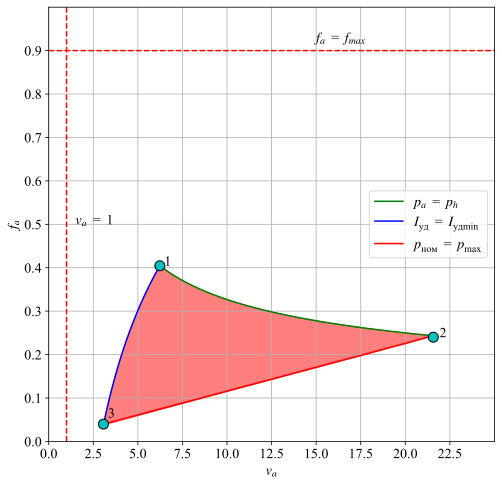

In [9]:
f = figure(figsize=(8, 8))
f.patch.set_facecolor('white')
plt.plot(v_1_2, f_1_2, color='g', label='$\mathit{p_a}$ $=$ $\mathit{p_h}$')
plt.plot(v_3_1, f_3_1, color='b',
         label='$\mathit{I}_{уд}$ $=$ $\mathit{I}_{уд min}$')
plt.plot(v_3_2, f_3_2, color='r',
         label='$\mathit{p}_{ном}$ $=$ $\mathit{p}_{max}}$')
plt.plot(v_a_list_1, f_a_list_1, linestyle='None', marker='o',
         color='c', markeredgecolor='black', markersize=10)

# Заливка
xx = []
xx.extend(v_1_2)
xx.extend(v_3_2)
xx.extend(v_3_1)
yy = []
yy.extend(f_1_2)
yy.extend(f_3_2)
yy.extend(f_3_1)
plt.fill(xx, yy, color = 'red', alpha = 0.5)

major_x_ticks = np.arange(0, 25, 2.5)
major_y_ticks = np.arange(0, 1, 0.1)
plt.xticks(major_x_ticks)
plt.yticks(major_y_ticks)
plt.grid()

plt.xlabel('$\mathit{v_a}$', fontsize=14)
plt.ylabel('$\mathit{f_a}$', fontsize=14)

plt.legend(loc='best')

plt.annotate('1', xy=(v_a1 + 0.25, f_a1),
             xytext=(v_a1 + 0.25, f_a1), fontsize=14)
plt.annotate('2', xy=(v_a2 + 0.35, f_a2),
             xytext=(v_a2 + 0.35, f_a2), fontsize=14)
plt.annotate('3', xy=(v_a3 + 0.25, f_a3 + 0.015),
             xytext=(v_a3 + 0.25, f_a3 + 0.015), fontsize=14)

plt.xlim(0, 25)
plt.ylim(0, 1)
plt.axvline(1, 0, 1, linestyle='--', color='red')
plt.axhline(0.9, 0, 1, linestyle='--', color='red')

plt.annotate('$\mathit{f_a}$ $=$ $\mathit{f_{max}}$', xy=(15, 0.92),
             xytext=(15, 0.92), fontsize=14)
plt.annotate('$\mathit{v_a}$ $=$ $1$', xy=(1.5, 0.5),
             xytext=(1.5, 0.5), fontsize=14)
# plt.savefig(f'Bounds.png', dpi =300, bbox_inches='tight')
plt.show()

# Обоснование проектных параметров РДТТ

## Определение диапазонов варьирования

In [10]:
def solver(a, b, c):
    # находим дискриминант
    D = b*b - 4*a*c
    if D >= 0:
        x1 = (-b + np.sqrt(D)) / (2*a)
        x2 = (-b - np.sqrt(D)) / (2*a)
        res = [x1, x2]
    else:
        res = "The discriminant is: %s \n This equation has no solutions" % D
    return res

In [11]:
a = 1 + z * (n - 1) / (n + 1)
b = - I_ud1 / (betta * eps(1)) * (1 + f_a2 / etta_f)
c = 1 - z
print('a =', a)
print('b =', b)
print('c =', c)

a = 1.0261293725580327
b = -2.543782937515966
c = 0.6760999999999999


In [12]:
lambda_a_min = round(max(solver(a, b, c)), 2)
lambda_a_max = round(lambda_a2, 2)
print('lambda_a_min =', lambda_a_min)
print('lambda_a_max =', lambda_a_max)
lambda_range = np.linspace(lambda_a_min, lambda_a_max, 11)

lambda_a_min = 2.18
lambda_a_max = 2.6


## Определение номинального давления в камере сгорания

In [13]:
v_a_arr = np.array([])
p_nom_arr = np.array([])
p_div_p_a_arr = np.array([])
I_ud_arr = np.array([])
f_a_arr = np.array([])

for l in lambda_range:
    I_udp = betta * (l + l ** -1) * eps(1) * dzeta(l)
    I_ud = I_udp * etta_f / (etta_f + f_a2)
    p_nom = p_h * betta * v_a(l) / (I_udp - I_ud)
    p_a = p_a3(p_nom, l)

    v_a_arr = np.append(v_a_arr, [v_a(l)])
    p_nom_arr = np.append(p_nom_arr, [p_nom / 1e6])
    p_div_p_a_arr = np.append(p_div_p_a_arr, [p_a / p_h])
    I_ud_arr = np.append(I_ud_arr, [I_ud])
    f_a_arr = np.append(f_a_arr, [f_a2])


data_1 = [np.round(lambda_range, 3), np.round(v_a_arr, 3), np.round(f_a_arr, 3),
          np.round(p_nom_arr, 3), np.round(p_div_p_a_arr, 3), np.round(I_ud_arr, 3)]
data_1_show = pd.DataFrame(data_1, index=["lambda_a", "v_a", "f_a_arr", "p_nom_arr, МПа",
                                          "p/p_a_arr", "I_ud_arr, м/с"], columns=[i for i in range(1, 12)]).T
pd.set_option('max_colwidth', 15)
display(data_1_show)

print(p_a3(16.593, 2.558))
# data_1_show.to_excel('data_1.xlsx')

,lambda_a,v_a,f_a_arr,"p_nom_arr, МПа",p/p_a_arr,"I_ud_arr, м/с"
1,2.180,4.466,0.24,4.824,1.892,2424.487
2,2.222,5.037,0.24,5.363,1.785,2459.929
3,2.264,5.720,0.24,6.003,1.684,2495.579
4,2.306,6.540,0.24,6.767,1.587,2531.425
5,2.348,7.535,0.24,7.686,1.494,2567.456
6,2.390,8.749,0.24,8.801,1.405,2603.662
7,2.432,10.245,0.24,10.165,1.321,2640.034
8,2.474,12.107,0.24,11.848,1.240,2676.565
9,2.516,14.447,0.24,13.947,1.163,2713.245
10,2.558,17.422,0.24,16.593,1.089,2750.068


0.10885454065221828


## Выбор формы топливного заряда и определение его геометрических характеристик

In [14]:
D_ks = 0.96 * D_n * 1e3  # mm
mu = 0.29
u_1 = 4.38


def u(p):
    return u_1 * (p) ** mu
print('D_ks =', D_ks)

D_ks = 585.6


In [15]:
e_d_arr = np.array([])
u_arr = np.array([])
for i in p_nom_arr:
    e_d = 2 / D_ks * u(i) * t_nom
    e_d_arr = np.append(e_d_arr, e_d)
    u_arr = np.append(u_arr, u(i))

avg = np.average(e_d_arr)


print('e_d_list:', *e_d_arr, sep='\n')
print('\naverage =', avg)

e_d_list:
0.4722055908354083
0.48693560539298797
0.5031087512030391
0.5208962745047244
0.5404981449536771
0.5621490672699256
0.586126042080314
0.6127579545809159
0.6424378441288092
0.6756387565265353
0.712934440010567

average = 0.5741534974079004


Из результатов расчёта видно, что $\overline{e_d} = 0,574 \Rightarrow \overline{e_d}\in [0,5...0,75] \Rightarrow$ заряд щелевой с цилиндрическим каналом.

In [16]:
count = 4
a_ = 0.3
c_ = 0.05

p_nom_fit = p_nom_arr[e_d_arr < 1 - c_]

e_d_fit = e_d_arr[e_d_arr < 1 - c_]

u_fit = u_arr[e_d_arr < 1 - c_]

I_ud_fit = I_ud_arr[e_d_arr < 1 - c_]

f_a_fit = f_a_arr[e_d_arr < 1 - c_]

v_a_fit = v_a_arr[e_d_arr < 1 - c_]

d__arr = 1 - e_d_fit

eps_f_arr = 1 - d__arr ** 2

f_sh_arr = count / np.pi * (c_ * (1 - c_ ** 2)**0.5 - c_ *
                            (d__arr**2-c_**2)**0.5 + np.arcsin(c_) - d__arr**2 * np.arcsin(c_ / d__arr))

eps_omega_arr = eps_f_arr - a_ * f_sh_arr

omega_arr = I_P / I_ud_fit
q_i = [0.14, 0.66, 0.2]
ro_i = [920, 1950, 1500]
total = 0

for i in range(len(ro_i)):
    total += q_i[i] / ro_i[i]

ro_t = round(1 / total)
print('ro_t =', ro_t)
F_ks = np.pi * (D_ks / 1e3) ** 2 / 4  # m**2

l_zar_arr = omega_arr / (ro_t * eps_omega_arr * F_ks)

kappa_arr = 4 * l_zar_arr / (D_ks / 1e3 * (1 - e_d_fit))

data_2 = [np.round(u_fit, 3), np.round(e_d_fit, 3), np.round(eps_omega_arr, 3), np.round(
    omega_arr, 3), np.round(l_zar_arr, 3), np.round(kappa_arr, 3)]

data_2_show = pd.DataFrame(data_2, index=["u_fit, мм/с", "e_d_fit", "eps_omega_arr", "omega_arr, кг",
                                          "l_zar_arr, м", "kappa_arr"], columns=[i for i in range(1, len(e_d_fit)+1)]).T
# pd.set_option('display.float_format', '{:.5}'.format)
display(data_2_show)

# data_2_show.to_excel('data_2.xlsx')

ro_t = 1603


,"u_fit, мм/с",e_d_fit,eps_omega_arr,"omega_arr, кг","l_zar_arr, м",kappa_arr
1,6.913,0.472,0.703,928.032,3.056,39.549
2,7.129,0.487,0.718,914.660,2.950,39.274
3,7.366,0.503,0.734,901.594,2.846,39.117
4,7.626,0.521,0.751,888.828,2.743,39.106
5,7.913,0.540,0.768,876.354,2.642,39.279
6,8.230,0.562,0.787,864.168,2.544,39.687
7,8.581,0.586,0.806,852.262,2.448,40.406
8,8.971,0.613,0.827,840.630,2.355,41.548
9,9.405,0.642,0.848,829.265,2.266,43.291
10,9.891,0.676,0.869,818.161,2.181,45.925


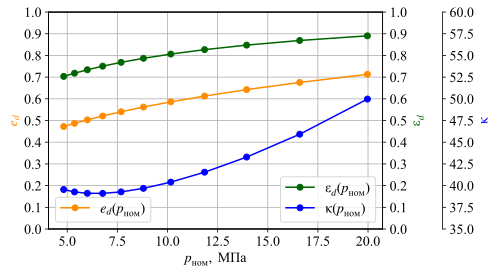

In [17]:
fig = plt.figure()
fig.patch.set_facecolor('white')
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

# host.set_xlim(0, 20)

elim = (0, 1)
epslim = (0, 1)
kappalim = (35, 60)

host.set_ylim(*elim)
par1.set_ylim(*epslim)
par2.set_ylim(*kappalim)

n = 11
host.yaxis.set_ticks(np.linspace(*elim, n))
par1.yaxis.set_ticks(np.linspace(*epslim, n))
par2.yaxis.set_ticks(np.linspace(*kappalim, n))

host.set_xlabel("$\mathit{p}_{ном},$ $МПа$")
host.set_ylabel("$\mathit{e_d}$")
par1.set_ylabel("$\epsilon_{\mathit{d}}$")
par2.set_ylabel("$\kappa$")

color1 = 'darkorange'
color2 = 'darkgreen'
color3 = 'blue'

p1, = host.plot(p_nom_fit, e_d_fit, color=color1,
                label="$\mathit{e_d}(\mathit{p}_{ном})$", marker='o')
p2, = par1.plot(p_nom_fit, eps_omega_arr, color=color2,
                label="$\epsilon_{\mathit{d}}(\mathit{p}_{ном})$", marker='o')
p3, = par2.plot(p_nom_fit, kappa_arr, color=color3,
                label="$\kappa(\mathit{p}_{ном})$", marker='o')

lns = [p1]
lns2 = [p2, p3]
host.legend(handles=lns, loc='lower left')
par1.legend(handles=lns2, loc='lower right')
par2.spines['right'].set_position(('outward', 60))

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

host.grid()
# plt.savefig(f'ed_epsomega_kappa(pnom).png', dpi =300, bbox_inches='tight')
plt.show()

## Определение проектных параметров ДУ минимальной массы

### Исходные данные

In [18]:
delta_p1, delta_p2 = 6, 6
delta_zks = 1
delta_vks = 15
delta_ps1 = 6
delta_ps2 = 3

ro_p = 1500
ro_zks = 920
ro_ps = 1750
ro_vks = 2200

sigma_vr = 1830
sigma_02 = 1830

k_1 = 1.1
k_2 = 1.2
etta = 1.25

D_t = 0.002
nu = 0.29
T_0 = 273.15+50
T_ref = 293.15
kappa_por = 100
tetta_1 = np.radians(30)
tetta_2 = np.radians(15)
# l_ob = l_zar
D_n = 610

def fi_kappa(kappa):
    if kappa > kappa_por:
        return 1 + 0.003 * (kappa - kappa_por)
    else:
        return 1


def u(p):
    return u_1 * (p) ** mu

### Решение

In [19]:
p_50 = p_nom_fit * np.exp((D_t * (T_0 - T_ref)) / (1-nu)) * 1 ** (1 / (1-nu))

p_p_arr = p_50 * sigma_vr / sigma_02 * k_1 * k_2 * etta

b = D_n / 4

delta_ob_arr = D_n / 2 * p_p_arr / sigma_vr

delta_dn_arr = D_n / 2 * p_p_arr / sigma_vr * ((D_n / b)**2/24 + 1 / 3)

D_a_arr = np.sqrt(4 / np.pi * f_a_fit * F_m *1e6)

D_kr_arr = D_a_arr / np.sqrt(v_a_fit)


### Вычисление объёмов элементов конструкции РДТТ

In [20]:
class Volume():
    def __init__(self, INIT):
        self.D_n = INIT[0]
        self.l_ob = INIT[1]
        self.delta_ob = INIT[2]
        self.delta_zks = INIT[3]
        self.b_1 = INIT[4]
        self.b_2 = INIT[5]
        self.delta_dn1 = INIT[6]
        self.delta_dn2 = INIT[7]
        self.delta_p1 = INIT[8]
        self.delta_p2 = INIT[9]
        self.d = INIT[10]
        self.D_vh = INIT[11]
        self.D_vih = INIT[12]
        self.D_kr = INIT[13]
        self.tetta_1 = INIT[14]
        self.tetta_2 = INIT[15]
        self.l_kr = INIT[16]
        self.delta_s1 = INIT[17]
        self.delta_s2 = INIT[18]
        self.delta_st = INIT[19]
        self.delta_ps1 = INIT[20]
        self.delta_ps2 = INIT[21]
        self.delta_vks = INIT[22]

    def cil_ks(self):
        d_ob = self.D_n - 2 * self.delta_ob
        S_ob = np.pi / 4 * (self.D_n ** 2 - d_ob ** 2)
        V_ob = S_ob * self.l_ob
        d_zks = d_ob - 2 * self.delta_zks
        S_zks = np.pi / 4 * (d_ob ** 2 - d_zks ** 2)
        V_zks = S_zks * self.l_ob
        return np.array([V_ob, V_zks])

    def ell_pd(self):
        V_dn1 = 2 / 3 * np.pi * self.delta_dn1 * \
            (self.D_n**2/4+self.D_n*self.b_1-(self.D_n+self.b_1)
             * self.delta_dn1 + self.delta_dn1**2)
        V_p1 = 2 / 3 * np.pi * self.delta_p1 * ((self.D_n - 2 * self.delta_dn1)**2/4+(
            self.D_n-2*self.delta_dn1)*(self.b_1-self.delta_dn1)-(self.D_n - 2*self.delta_dn1+self.b_1 - self.delta_dn1) * self.delta_p1 + self.delta_p1**2)
        return np.array([V_dn1, V_p1])

    def ell_sd(self):
        V_dn2 = np.pi / 6 * self.D_n**2*self.b_1*(1-(self.d/self.D_n)**2)**(3/2) - np.pi / 6 * (
            self.D_n - 2 * self.delta_dn1)**2*(self.b_1-self.delta_dn1)*(1 - self.d**2 / (self.D_n - 2 * self.delta_dn1)**2)**(3/2)
        V_p2 = np.pi / 6 * (self.D_n - 2 * self.delta_dn1)**2*(self.b_1-self.delta_dn1)*(1-(self.d/(self.D_n - 2*self.delta_dn1))**2)**(3/2) - np.pi / 6 * (
            (self.D_n - 2*self.delta_dn1) - 2 * self.delta_p1)**2*(self.b_1 - self.delta_dn1-self.delta_p1)*(1 - self.d**2 / (self.D_n - 2 * self.delta_dn1 - 2*self.delta_p1)**2)**(3/2)
        return np.array([V_dn2, V_p2])

    def cil_st(self):
        d_st = self.D_kr + 2 * self.delta_vks
        S_st = np.pi / 4 * ((self.D_kr + 2 * self.delta_st +
                            2 * self.delta_vks) ** 2 - d_st ** 2)
        V_st = S_st * self.l_kr
        D_vks = self.D_kr + 2 * self.delta_vks
        S_vks = np.pi / 4 * (D_vks ** 2 - self.D_kr ** 2)
        V_vks = S_vks * self.l_kr
        return np.array([V_st, V_vks])

    def kon_1(self):
        l_kon_1 = (self.D_vh - self.D_kr) / 2 / np.tan(self.tetta_1)
        V_s1 = np.pi * l_kon_1 * self.delta_s1 / np.cos(self.tetta_1) * (
            (self.D_vh + 2 * self.delta_ps1 / np.cos(self.tetta_1) + self.D_kr + 2 * self.delta_ps1 / np.cos(self.tetta_1)) / 2 + self.delta_s1 / np.cos(self.tetta_1))
        V_ps1 = np.pi * l_kon_1 * self.delta_ps1 / \
            np.cos(self.tetta_1) * ((self.D_vh + self.D_kr) /
                                    2 + self.delta_ps1 / np.cos(self.tetta_1))
        return np.array([V_s1, V_ps1])

    def kon_2(self):
        l_kon_2 = (self.D_vih - self.D_kr) / 2 / np.tan(self.tetta_2)
        V_s2 = np.pi * l_kon_2 * self.delta_s2 / np.cos(self.tetta_2) * (
            (self.D_vih + 2 * self.delta_ps2 / np.cos(self.tetta_2) + self.D_kr + 2 * self.delta_ps2 / np.cos(self.tetta_2)) / 2 + self.delta_s2 / np.cos(self.tetta_2))
        V_ps2 = np.pi * l_kon_2 * self.delta_ps2 / np.cos(self.tetta_2) * (
            (self.D_vih + self.D_kr) / 2 + self.delta_ps2 / np.cos(self.tetta_2))
        return np.array([V_s2, V_ps2])

In [21]:
D_n = 610
l_ob_arr = l_zar_arr *1e3
delta_ob = delta_ob_arr
print(delta_ob)
delta_zks = 1
b_1 = b
b_2 = b
delta_dn1 = delta_dn_arr
delta_dn2 = delta_dn_arr
delta_p1 = 6
delta_p2 = 6
d = D_n / 2


D_vh = D_n / 2
D_vih = D_a_arr
D_kr = D_a_arr / np.sqrt(v_a_fit)
tetta_1 = np.radians(30)
tetta_2 = np.radians(15)
l_kr = D_kr / 2
delta_s1 = 2 * delta_ob
delta_s2 = delta_ob
delta_st = 3 * delta_ob
delta_ps1 = 6
delta_ps2 = 3
delta_vks = 15
INIT_V = [D_n, l_ob_arr, delta_ob, delta_zks, b_1, b_2, delta_dn1, delta_dn2, delta_p1, delta_p2, d, D_vh,
          D_vih, D_kr, tetta_1, tetta_2, l_kr, delta_s1, delta_s2, delta_st, delta_ps1, delta_ps2, delta_vks]
V_cil = Volume(INIT_V).cil_ks()
print('V_об =', V_cil[0])
print('V_зкс =', V_cil[1])
V_dn_1 = Volume(INIT_V).ell_pd()
print('V_дн1 =', V_dn_1[0])
print('V_п1 =', V_dn_1[1])
V_dn_2 = Volume(INIT_V).ell_sd()
print('V_дн2 =', V_dn_2[0])
print('V_п2 =', V_dn_2[1])
V_st = Volume(INIT_V).cil_st()
print('V_ст =', V_st[0])
print('V_вкс =', V_st[1])
V_kon_1 = Volume(INIT_V).kon_1()
print('V_с1 =', V_kon_1[0])
print('V_пс1 =', V_kon_1[1])
V_kon_2 = Volume(INIT_V).kon_2()
print('V_с2 =', V_kon_2[0])
print('V_пс2 =', V_kon_2[1])

[1.44369459 1.60500627 1.79642437 2.02507579 2.30018    2.63378337
 3.04179634 3.54547766 4.17358999 4.96557919 5.97634377]
V_об = [ 8434745.89710836  9049639.69743176  9767352.91759886 10609422.83997284
 11603368.36041428 12784748.36811471 14200085.46653965 15911093.0759808
 18000908.94670694 20583494.03645376 23818166.56914952]
V_зкс = [5819011.67011876 5614240.52673121 5412108.80255043 5212957.45999411
 5017153.01840847 4825096.55428286 4637235.39723487 4454078.77201046
 4276219.32748829 4104363.66996585 3939377.11215718]
V_дн1 = [ 559231.02047401  621305.06427155  694857.16437617  782563.80948373
  887869.37931303 1015246.18330673 1170555.96271779 1361557.3502258
 1598625.05788841 1895778.37880031 2272163.67437071]
V_п1 = [2253673.07519878 2250636.77205598 2247036.33348536 2242739.1836657
 2237574.25024991 2231318.68165083 2223679.22797995 2214265.83401554
 2202553.72590095 2187828.28489676 2169103.85118048]
V_дн2 = [ 453427.78507711  503681.59097246  563207.83609141  634161.063937

### Построение графиков

In [22]:
ro_kor_arr = np.array([7800 * 1e-9]*11)
ro_zks_arr = np.array([ro_zks * 1e-9]*11)
ro_p_arr = np.array([ro_p * 1e-9]*11)
ro_vks_arr = np.array([ro_vks * 1e-9]*11)
ro_ps_arr = np.array([ro_ps * 1e-9]*11)
ro_cil = np.array([ro_kor_arr, ro_zks_arr])
ro_dn_1 = np.array([ro_kor_arr, ro_p_arr])
ro_dn_2 = np.array([ro_kor_arr, ro_p_arr])
ro_st = np.array([ro_kor_arr, ro_vks_arr])
ro_kon_1 = np.array([ro_kor_arr, ro_ps_arr])
ro_kon_2 = np.array([ro_kor_arr, ro_ps_arr])
ro = np.array([ro_cil, ro_dn_1, ro_dn_2, ro_st, ro_kon_1, ro_kon_2])
V = np.array([V_cil, V_dn_1, V_dn_2, V_st, V_kon_1, V_kon_2])
m_dv_i = ro * V #true
m_dv_zer = [[0] for i in range(len(V))]

for i in range(len(V)):
    m_dv_zer[i] = m_dv_i[i][0] + m_dv_i[i][1]
m_dv_0 = sum(m_dv_zer)

m_dv_arr = m_dv_0 + omega_arr
alpha_dv_arr = m_dv_0 / omega_arr
l_dv_arr = b + l_ob_arr + b * np.sqrt(1 - (D_vh / D_n)**2) + (D_vh - D_kr) / \
    (2 * np.tan(tetta_1)) + D_kr / 2 + (D_a_arr - D_kr) / (2 * np.tan(tetta_2))

# определение критерия
c_dv_arr = np.sqrt((m_dv_arr * l_dv_arr) / (min(m_dv_arr) * min(l_dv_arr)))
c_dv_opt = min(c_dv_arr)
m_dv_opt = m_dv_arr[c_dv_opt == c_dv_arr]
l_dv_opt = l_dv_arr[c_dv_opt == c_dv_arr]
p_nom_opt = p_nom_arr[c_dv_opt == c_dv_arr]

data_3 = [np.round(delta_ob_arr, 3), np.round(D_kr, 3), np.round(m_dv_0, 3), np.round(
    m_dv_arr, 3), np.round(alpha_dv_arr, 3), np.round(l_dv_arr, 3), np.round(c_dv_arr, 3)]
data_3_show = pd.DataFrame(data_3, index=["delta_ob_arr, мм","D_kr, мм", "m_dv_0, кг", "m_dv_arr, кг",
                                          "alpha_dv_arr", "l_dv_arr, мм", "c_dv_arr"], columns=[i for i in range(1, len(e_d_fit)+1)]).T
# pd.set_option('display.float_format', '{:.5}'.format)
display(data_3_show)

# data_3_show.to_excel('data_3.xlsx')


,"delta_ob_arr, мм","D_kr, мм","m_dv_0, кг","m_dv_arr, кг",alpha_dv_arr,"l_dv_arr, мм",c_dv_arr
1,1.444,141.414,95.206,1023.237,0.103,3846.651,1.131
2,1.605,133.150,101.417,1016.077,0.111,3759.129,1.115
3,1.796,124.954,108.744,1010.338,0.121,3673.011,1.099
4,2.025,116.852,117.429,1006.256,0.132,3588.457,1.084
5,2.300,108.870,127.782,1004.137,0.146,3505.650,1.070
6,2.634,101.032,140.208,1004.375,0.162,3424.806,1.058
7,3.042,93.362,155.234,1007.495,0.182,3346.187,1.047
8,3.545,85.884,173.565,1014.195,0.206,3270.115,1.039
9,4.174,78.621,196.155,1025.421,0.237,3196.998,1.033
10,4.966,71.595,224.313,1042.474,0.274,3127.359,1.030


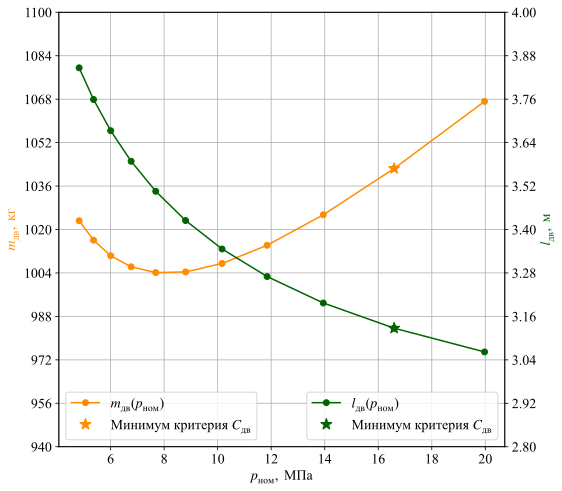

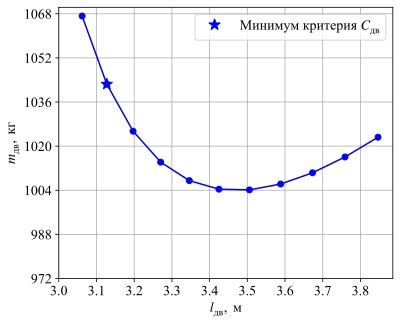

In [23]:
fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
host = fig.add_subplot(111)

par1 = host.twinx()

# host.set_xlim(0, 20)

mdvlim = (940, 1100)
ldvlim = (2.8, 4)

host.set_ylim(*mdvlim)
par1.set_ylim(*ldvlim)

n = 11
host.yaxis.set_ticks(np.linspace(*mdvlim, n))
par1.yaxis.set_ticks(np.linspace(*ldvlim, n))

host.set_xlabel("$\mathit{p}_{ном},$ $МПа$")
host.set_ylabel("$\mathit{m}_{дв},$ $кг$")
par1.set_ylabel("$\mathit{l}_{дв},$ $м$")

color1 = 'darkorange'
color2 = 'darkgreen'
color3 = 'blue'

p1, = host.plot(p_nom_fit, m_dv_arr, color=color1,
                label="$\mathit{m}_{дв}(\mathit{p}_{ном})$", marker='o')
p2, = par1.plot(p_nom_fit, l_dv_arr / 1e3, color=color2,
                label="$\mathit{l}_{дв}(\mathit{p}_{ном})$", marker='o')
p3, = host.plot(p_nom_opt, m_dv_opt, marker='*', color=color1, linestyle='None',
                markersize=12, label="$Минимум$ $критерия$ $\mathit{C}_{дв}$")
p4, = par1.plot(p_nom_opt, l_dv_opt / 1e3, marker='*', color=color2, linestyle='None',
                markersize=12, label="$Минимум$ $критерия$ $\mathit{C}_{дв}$")
lns = [p1, p3]
lns2 = [p2, p4]
host.legend(handles=lns, loc='lower left')
par1.legend(handles=lns2, loc='lower right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
host.grid()
# plt.savefig(f'm_dv__l_dv(pnom).png', dpi =300, bbox_inches='tight')
plt.show()

f = figure(figsize=(6, 5))
f.patch.set_facecolor('white')
plt.plot(l_dv_arr * 1e-3, m_dv_arr, color='b', marker='o')
plt.plot(l_dv_opt*1e-3, m_dv_opt, marker='*', markersize=12, color='b', linestyle='None',
         label="$Минимум$ $критерия$ $\mathit{C}_{дв}$")
plt.xlabel('$\mathit{l}_{дв},$ $м$')
plt.ylabel('$\mathit{m}_{дв},$ $кг$')
# установка шага сетки
major_yticks3 = np.arange(972, 1068 + 1, 16)
plt.yticks(major_yticks3)
major_xticks3 = np.arange(3, 3.8+0.1, 0.1)
plt.xticks(major_xticks3)
plt.legend()
plt.grid()
# plt.savefig(f'm_dv(l_dv).png', dpi =300, bbox_inches='tight')
plt.show()